<a href="https://colab.research.google.com/github/AhzamAhmed6/FashionMNIST-using-CNN/blob/main/27PyTorch_CNN_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torchvision.transforms as transforms

In [2]:
train_dataset = torchvision.datasets.FashionMNIST(
    root='.',
    download=True,
    train=True,
    transform=transforms.ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



In [3]:
test_dataset = torchvision.datasets.FashionMNIST(
    root='.',
    download=True,
    train=False,
    transform=transforms.ToTensor()
)

In [4]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

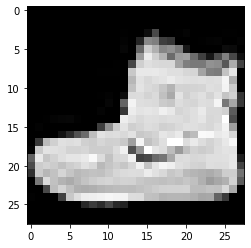

In [5]:
plt.imshow(train_dataset.data[0], cmap='gray');

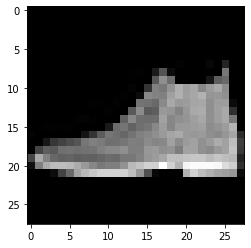

In [6]:
plt.imshow(test_dataset.data[0], cmap='gray');

In [7]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [8]:
K = len(set(train_dataset.targets.numpy()))
N = len(train_dataset.targets)
D = 28*28

In [9]:
batch_size=128
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset,
                                           batch_size=batch_size,
                                           shuffle=False)

In [10]:
for images, labels in train_loader:
  print(images.shape)
  break

torch.Size([128, 1, 28, 28])


In [15]:
k = len(set(train_dataset.targets.numpy()))
k

10

In [36]:
model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    # nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3),
    # nn.ReLU(),
    # nn.MaxPool2d(2, 2),
    nn.Flatten(),
    nn.Linear(16*5*5, 300),
    nn.ReLU(),
    nn.Linear(300, k)
)

In [29]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [30]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)

Sequential(
  (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Flatten(start_dim=-1, end_dim=800)
  (10): Linear(in_features=800, out_features=300, bias=True)
  (11): ReLU()
  (12): Linear(in_features=300, out_features=10, bias=True)
)

In [44]:
epochs=10
def training(epochs, train_loader, test_loader, criterion, optimizer, model):
  
  train_losses=np.zeros(epochs)
  test_losses=np.zeros(epochs)
  for i in range(epochs):
    train_loss=[]
    for input, target in train_loader:
      input, target = input.to(device), target.to(device)
      optimizer.zero_grad()
      output = model(input)
      loss = criterion(output, target)
      train_loss.append(loss.item())
      loss.backward()
      optimizer.step()
    train_losses[i] = np.mean(train_loss)
    
    test_loss=[]
    for input, target in test_loader:
      input, target = input.to(device), target.to(device)
      optimizer.zero_grad()
      output = model(input)
      loss = criterion(output, target)
      test_loss.append(loss.item())
      loss.backward()
      optimizer.step()
    test_losses[i] = np.mean(test_loss)
    print(f'Train Loss= {train_loss}, Test Loss= {test_loss}')
  return train_losses, test_losses

In [45]:
train_losses, test_losses = training(epochs, train_loader, test_loader, criterion, optimizer, model)

Train Loss= [2.305654287338257, 2.3009192943573, 2.301039218902588, 2.2976505756378174, 2.3049721717834473, 2.3075950145721436, 2.3007099628448486, 2.3039281368255615, 2.310105323791504, 2.301598072052002, 2.303727865219116, 2.3039286136627197, 2.3078315258026123, 2.308976888656616, 2.303347587585449, 2.3038604259490967, 2.3003828525543213, 2.2988789081573486, 2.3024535179138184, 2.2983946800231934, 2.3025383949279785, 2.313659906387329, 2.3125503063201904, 2.299776077270508, 2.302025079727173, 2.301010847091675, 2.298656463623047, 2.30202317237854, 2.3058485984802246, 2.3084280490875244, 2.3121144771575928, 2.2958791255950928, 2.306168794631958, 2.3094427585601807, 2.2984471321105957, 2.30165958404541, 2.308199882507324, 2.301386833190918, 2.3027026653289795, 2.2977800369262695, 2.307312488555908, 2.3007121086120605, 2.310563087463379, 2.3086113929748535, 2.2928009033203125, 2.3035929203033447, 2.2956929206848145, 2.306441307067871, 2.2986714839935303, 2.3037033081054688, 2.3015863895

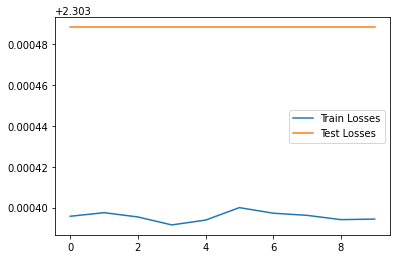

In [46]:
plt.plot(train_losses, label='Train Losses')
plt.plot(test_losses, label='Test Losses')
plt.legend();